In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [94]:
data = pd.read_csv("survey lung cancer.csv")
data["GENDER"] = [1 if x == "M" else 0 for x in data["GENDER"] ]
data["LUNG_CANCER"] = [1 if x == "YES" else 0 for x in data["LUNG_CANCER"]]

In [95]:
data.info()
#no categorical data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

In [96]:
#In all the data, yes is 2 and no is 1, I changed it to yes is 1 and no is 0
for column in data.columns[2:-1]:
    data[column] = [1 if x == 2 else 0 for x in data[column]]

In [97]:
data = data.drop_duplicates()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002F8EADD7880>,
      dtype=object)

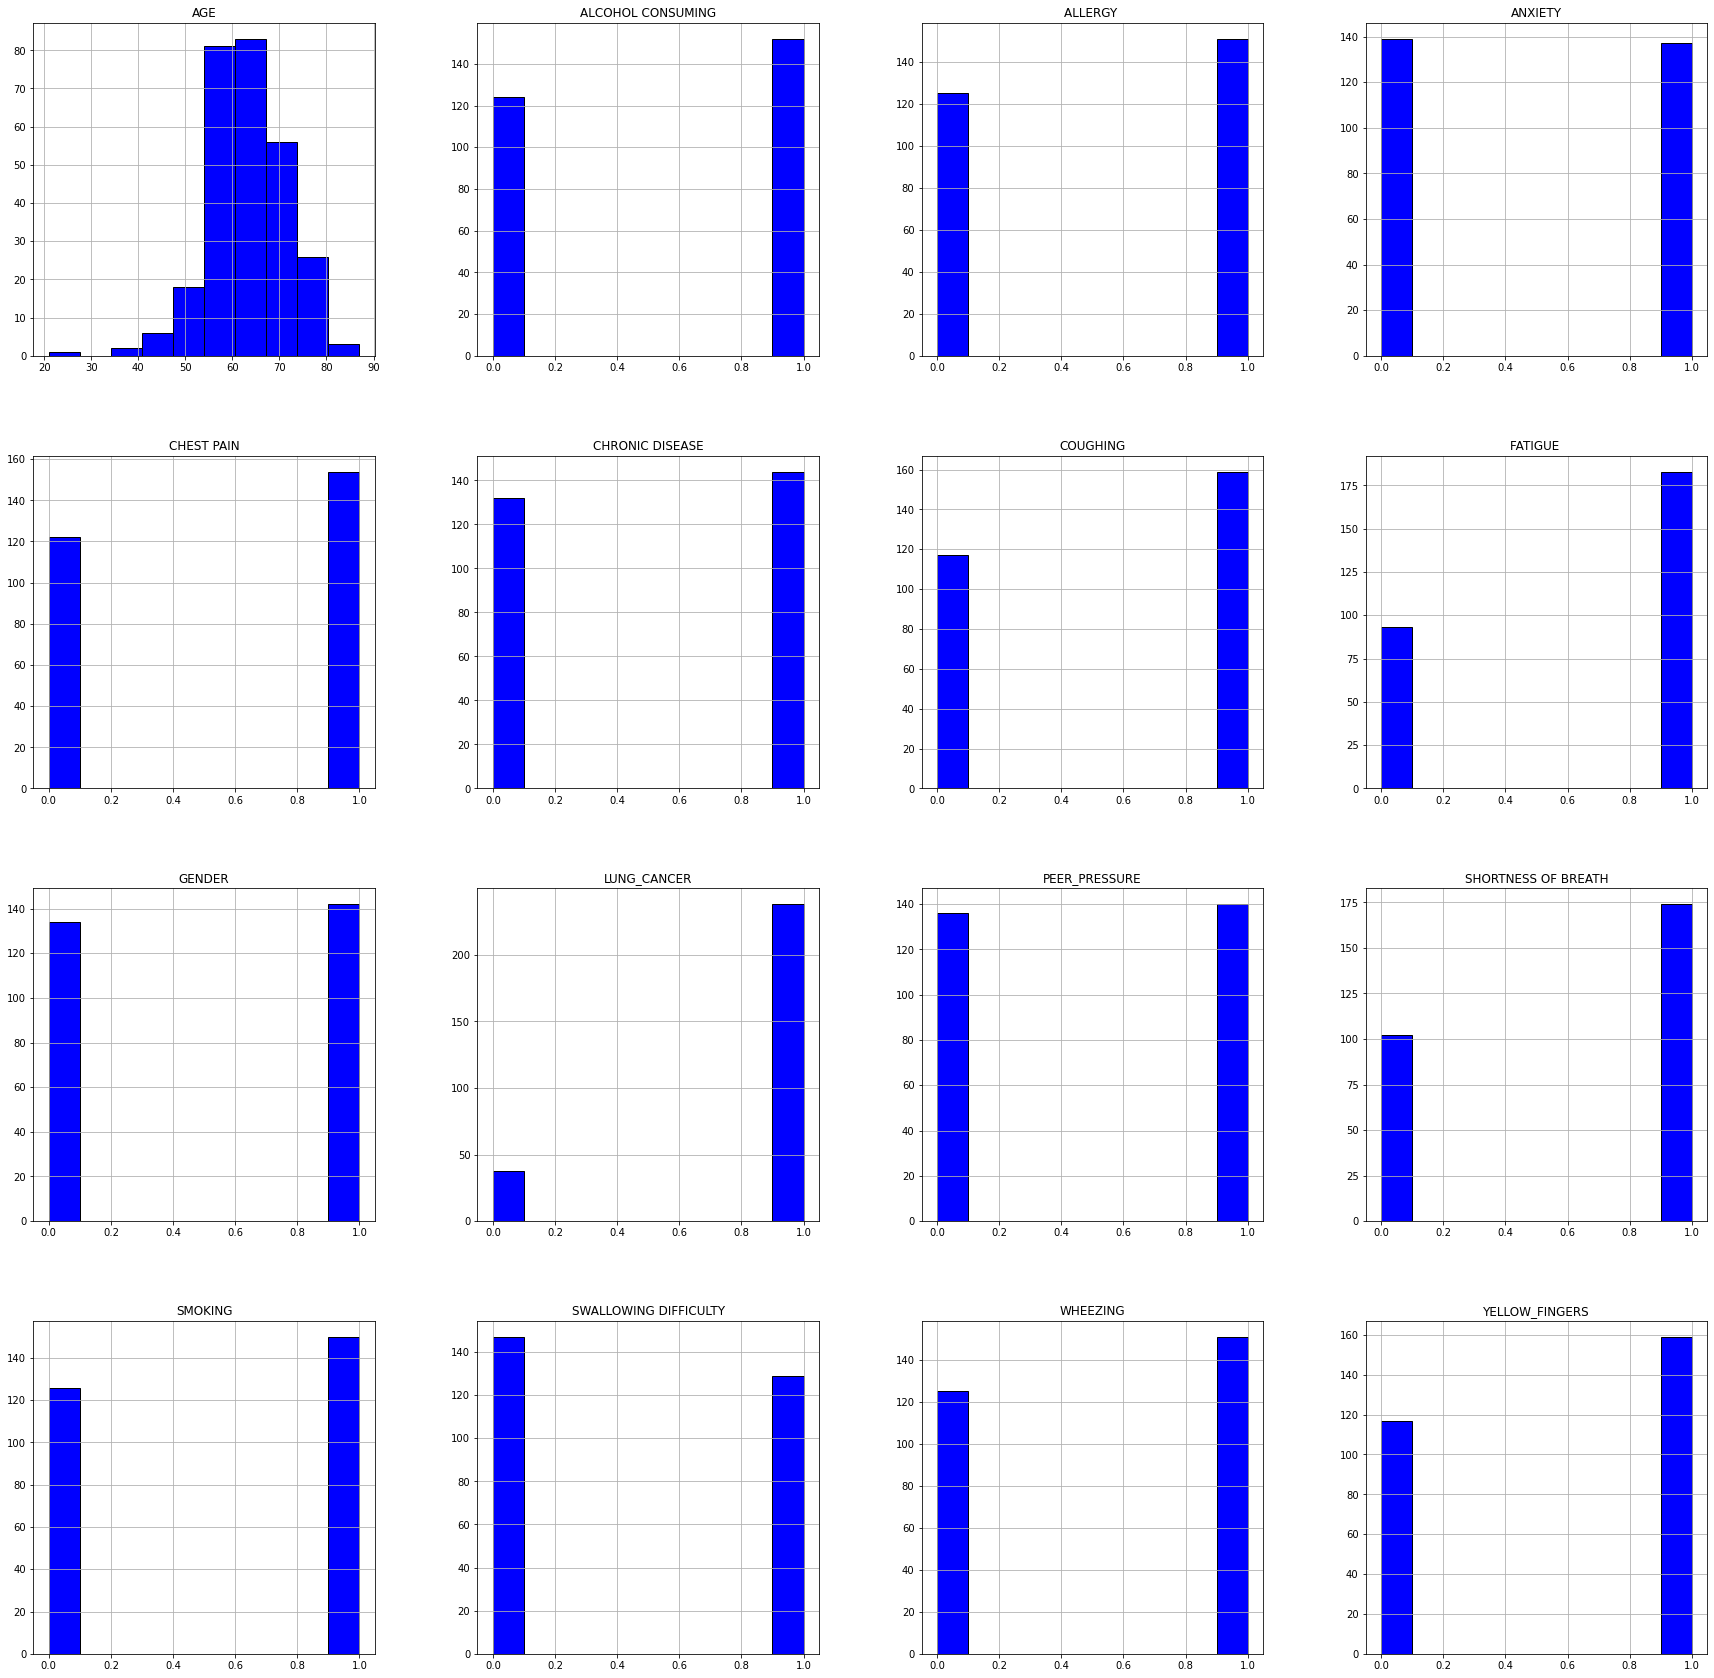

In [98]:
#Looking at the data to find patterns
data.hist(figsize = (30,30),color = 'blue',edgecolor = 'black')

In [169]:
from sklearn.model_selection import train_test_split
y = data["LUNG_CANCER"]
X = data.drop("LUNG_CANCER",axis=1)
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.33,random_state=42)

In [170]:
#Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_index = X_train.index
X_valid_index = X_valid.index
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_valid_scaled = pd.DataFrame(scaler.transform(X_valid),columns=X_train.columns)


X_train_scaled.index = X_train_index
X_valid_scaled.index = X_valid_index


In [171]:
#Building the model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [172]:
rf_model.score(X_valid_scaled,y_valid)
#92% accuracy

0.9239130434782609